# Final Project Part 2 - Cats vs. Dog Image Classification using Keras
*for General Assembly Part Time Data Science course*  
*developed by Carmen Cincotti*

## CNN Implementation using Keras
In my final submission I'd like to write a little more on CNN's and how they work in order to round out my knowledge, as well as open the floor for feedback. But for the sake of this being a quick and dirty second part, I'll go ahead and describe the steps in the code to building a CNN, and write theory in the final project.

### What is Keras? Why use it?
I am using Keras because it is a deep learning library used for fast prototyping CNNs with simple API's written in Python.  

In [88]:
%matplotlib inline 

import pandas as pd
import glob
import matplotlib.pyplot as plt
import keras
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from PIL import Image

In [89]:
# Let's create a dataframe.

labels = []

cat_files = glob.glob("data/new/train/cat*.jpg")
dog_files = glob.glob("data/new/train/dog*.jpg")
filenames = cat_files + dog_files

for cat_file in cat_files:
    labels.append("cat")

for dog_file in dog_files:
    labels.append("dog")

df = pd.DataFrame({
    'filename': filenames,
    'label': labels
})

df.sample(5)

,filename,label
21118,data/new/train/dog.718.jpg,dog
7955,data/new/train/cat.241.jpg,cat
11077,data/new/train/cat.5534.jpg,cat
5246,data/new/train/cat.2422.jpg,cat
10893,data/new/train/cat.2075.jpg,cat


In [90]:
# Shape of data
print(df.shape)

(25000, 2)


In [91]:
# ImageDataGenerator will be used to split our data into a train and test (validation) sets

## Instantiate, we'll optimize this later.
# We're splitting the data here (similar to test train split.)
train_datagen = ImageDataGenerator(
    rescale=1./255, # rescale is done here to reduce our 0-255 RGB values to between 0-1 for better comp. time.
    validation_split=0.2 # 80% training set /20% validation set
)

test_datagen = ImageDataGenerator(
    rescale=1./255
)

batch_size=64
img_dim=150

train_data = train_datagen.flow_from_dataframe(
    dataframe=df,
    x_col='filename',
    y_col="label",
    subset="training",
    classes=["dog", "cat"],
    batch_size=batch_size,
    target_size=(img_dim, img_dim)
)

validation_data = train_datagen.flow_from_dataframe(
    dataframe=df,
    subset="validation",
    x_col='filename',
    y_col="label",
    classes=["dog", "cat"],
    batch_size=batch_size,
    target_size=(img_dim, img_dim)
)

# flow from directory here since there are no classes, so you just need images
test_data = test_datagen.flow_from_directory(
    directory=r"data/new/test/",
    batch_size=batch_size,
    target_size=(img_dim, img_dim),
    seed=42,
    shuffle=False,
)

Found 20000 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.
Found 12500 images belonging to 1 classes.


## Training a model

In [92]:
# So we need to train a model of a linear stack of layers and ultimately have the model tell us if it's a cat or a dog.
# Keras provides a Sequential model for just that.

from keras.models import Sequential

model = Sequential([])

In [93]:
# The Layers
# This is a doozy but ultimately we have many hidden layers that serve to convolve the image.
# The role of the CNN is to reduce the images into a form which is easier to process, without losing features which are critical for getting a good prediction. 
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.layers import Dense

# Conv2D layer
# https://www.pyimagesearch.com/2018/12/31/keras-conv2d-and-convolutional-layers/
# https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53]
# https://keras.io/layers/convolutional/
'''
This layer is responsible for detecting features through convulving the image as well as reducing it's dimensionality.
To be brief, a filter (in our case, 3x3) will traverse through the original image, a dot multiplication between the two will occur, and save the output into a 2D 'activation map'.
We define in the arguments that we want to learn 32 filters, and a filter size of 3x3, and an activation function.

More on this to come. 

Ideally, we will do this process more than once, but as a first pass, let's just get a base level.

'''
model.add(Conv2D(32, (3, 3), activation="relu", input_shape=(img_dim,img_dim,3)))

#TK: Pooling layer - will do for final.

# Flatten
'''
Basically, we're just flattening these 2D layers into 1D to feed into a regular NN for classification.
'''
model.add(Flatten())

# Dense
# Per Keras docs - 'Just your regular densely-connected NN layer.''
model.add(Dense(2, activation="softmax"))


In [94]:
# Compile the model
from keras.optimizers import RMSprop
model.compile(
    optimizer=RMSprop(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [95]:
# Fit the model
# These arguments come from research.
history = model.fit_generator(
    train_data,
    steps_per_epoch=batch_size // 10,
    validation_data=validation_data,
    validation_steps=batch_size // 10,
    epochs=20,
    verbose=2
)

Epoch 1/20
 - 5s - loss: 50.8116 - accuracy: 0.5677 - val_loss: 117.9699 - val_accuracy: 0.0000e+00
Epoch 2/20
 - 5s - loss: 19.4083 - accuracy: 0.5339 - val_loss: 83.7228 - val_accuracy: 0.0000e+00
Epoch 3/20
 - 3s - loss: 15.4586 - accuracy: 0.5365 - val_loss: 27.6676 - val_accuracy: 0.0000e+00
Epoch 4/20
 - 4s - loss: 8.3842 - accuracy: 0.5052 - val_loss: 4.8848 - val_accuracy: 0.0521
Epoch 5/20
 - 4s - loss: 3.4930 - accuracy: 0.5443 - val_loss: 10.8971 - val_accuracy: 0.0000e+00
Epoch 6/20
 - 3s - loss: 2.4211 - accuracy: 0.5703 - val_loss: 0.5557 - val_accuracy: 0.7188
Epoch 7/20
 - 4s - loss: 0.9712 - accuracy: 0.5859 - val_loss: 9.0479 - val_accuracy: 0.0000e+00
Epoch 8/20
 - 4s - loss: 1.5087 - accuracy: 0.5703 - val_loss: 0.4249 - val_accuracy: 0.9453
Epoch 9/20
 - 4s - loss: 0.7844 - accuracy: 0.5755 - val_loss: 0.8549 - val_accuracy: 0.5885
Epoch 10/20
 - 3s - loss: 0.6758 - accuracy: 0.6823 - val_loss: 1.0154 - val_accuracy: 0.2318
Epoch 11/20
 - 4s - loss: 0.7622 - accura

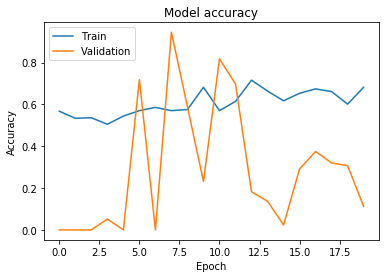

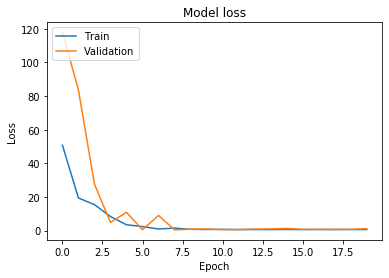

In [96]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [97]:
from sklearn.metrics import confusion_matrix
validation_preds = model.predict_generator(validation_data, steps=1)
validation_preds = np.argmax(validation_preds,axis=1)
cm = confusion_matrix(test_labels, validation_preds)
cm


array([[ 0,  0],
       [ 7, 57]])

... hmm, 57 true positives, 7 false negatives. It looks like we keep guessing cats?

## Thoughts at this point
OK so clearly there's a bunch of work that needs to be done. I think we can sum it up to quite a few items.

### Data processing and augmentation
So Keras has the ability to transform our images each into multiple versions of itself, but with slight variations. For example, each image could have a variation where the image is horizontally flipped, rotated, etc. These transformations serve to train the model better.

We could also play around with image sizes and batch sizes.

These both have trade offs as we're introducing higher computation times/intensity, but that should be OK, given the model accuracy is relatively all over the place at this moment.

### The model
OK so this model was pretty basic, and almost was the bare minimum needed to create a CNN. Some ideas for improvement
 - Better CNN set up, dive deeper into principles and see how this can be optimized.
 - Include more convolution layers, and include max pooling
 - Speed up computations using Keras callbacks that can prevent lengthy and resource intensive epochs if the validation accuracy is converging.

## Testing

In [98]:
test_images, test_labels = next(test_data)
test_labels = test_labels[:, 0] # 2d -> 1d

In [99]:
# Let's use the prediction generator

predictions = model.predict_generator(test_data, steps=1)
predictions = np.argmax(predictions,axis=1)

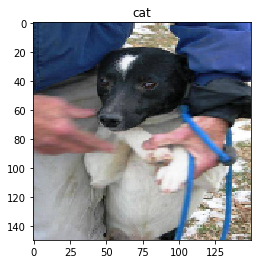

None


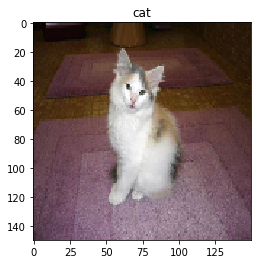

None


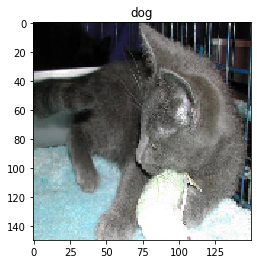

None


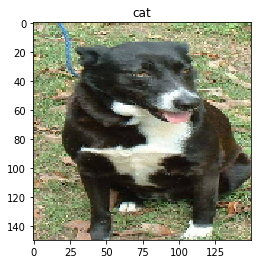

None


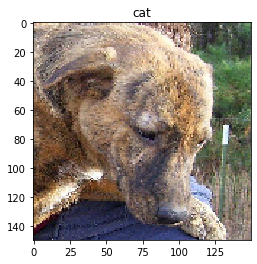

None


In [100]:
def plot(prediction):
    ## 0 is dog, 1 is cat
    title = "cat" if prediction[0] == 1 else "dog"
    plt.imshow(prediction[1],aspect='equal')
    plt.title(title)
    plt.show();
show_predictions = map(plot, list(zip(predictions,test_images)))
print(next(show_predictions))
print(next(show_predictions))
print(next(show_predictions))
print(next(show_predictions))
print(next(show_predictions))

Alright yeah we have some work to do.